# **MACHINE LEARNING REGRESSION: LOGISTIC REGRESSION (NON-LINEAR)**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from itertools import cycle

### DATA PREPERATION

Importing and Inspecting the CSV file

In [2]:
df = pd.read_csv('GPU_benchmarks.csv')
print(df.dtypes)
print(df.head())

gpuName              object
G3Dmark               int64
G2Dmark               int64
price               float64
gpuValue            float64
TDP                 float64
powerPerformance    float64
testDate              int64
category             object
dtype: object
               gpuName  G3Dmark  G2Dmark    price  gpuValue    TDP  \
0  GeForce RTX 3090 Ti    29094     1117  2099.99     13.85  450.0   
1  GeForce RTX 3080 Ti    26887     1031  1199.99     22.41  350.0   
2     GeForce RTX 3090    26395      999  1749.99     15.08  350.0   
3    Radeon RX 6900 XT    25458     1102  1120.31     22.72  300.0   
4     GeForce RTX 3080    24853     1003   999.00     24.88  320.0   

   powerPerformance  testDate category  
0             64.65      2022  Unknown  
1             76.82      2021  Desktop  
2             75.41      2020  Desktop  
3             84.86      2020  Desktop  
4             77.66      2020  Desktop  


### Check For Null Values

In [3]:
df.isnull().sum()

gpuName                0
G3Dmark                0
G2Dmark                0
price               1764
gpuValue            1764
TDP                 1625
powerPerformance    1625
testDate               0
category               0
dtype: int64

### Handle missing values

In [6]:
df = df.dropna()
df.isnull().sum()

gpuName             0
G3Dmark             0
G2Dmark             0
price               0
gpuValue            0
TDP                 0
powerPerformance    0
testDate            0
category            0
dtype: int64

### Visualization on Gpu prices

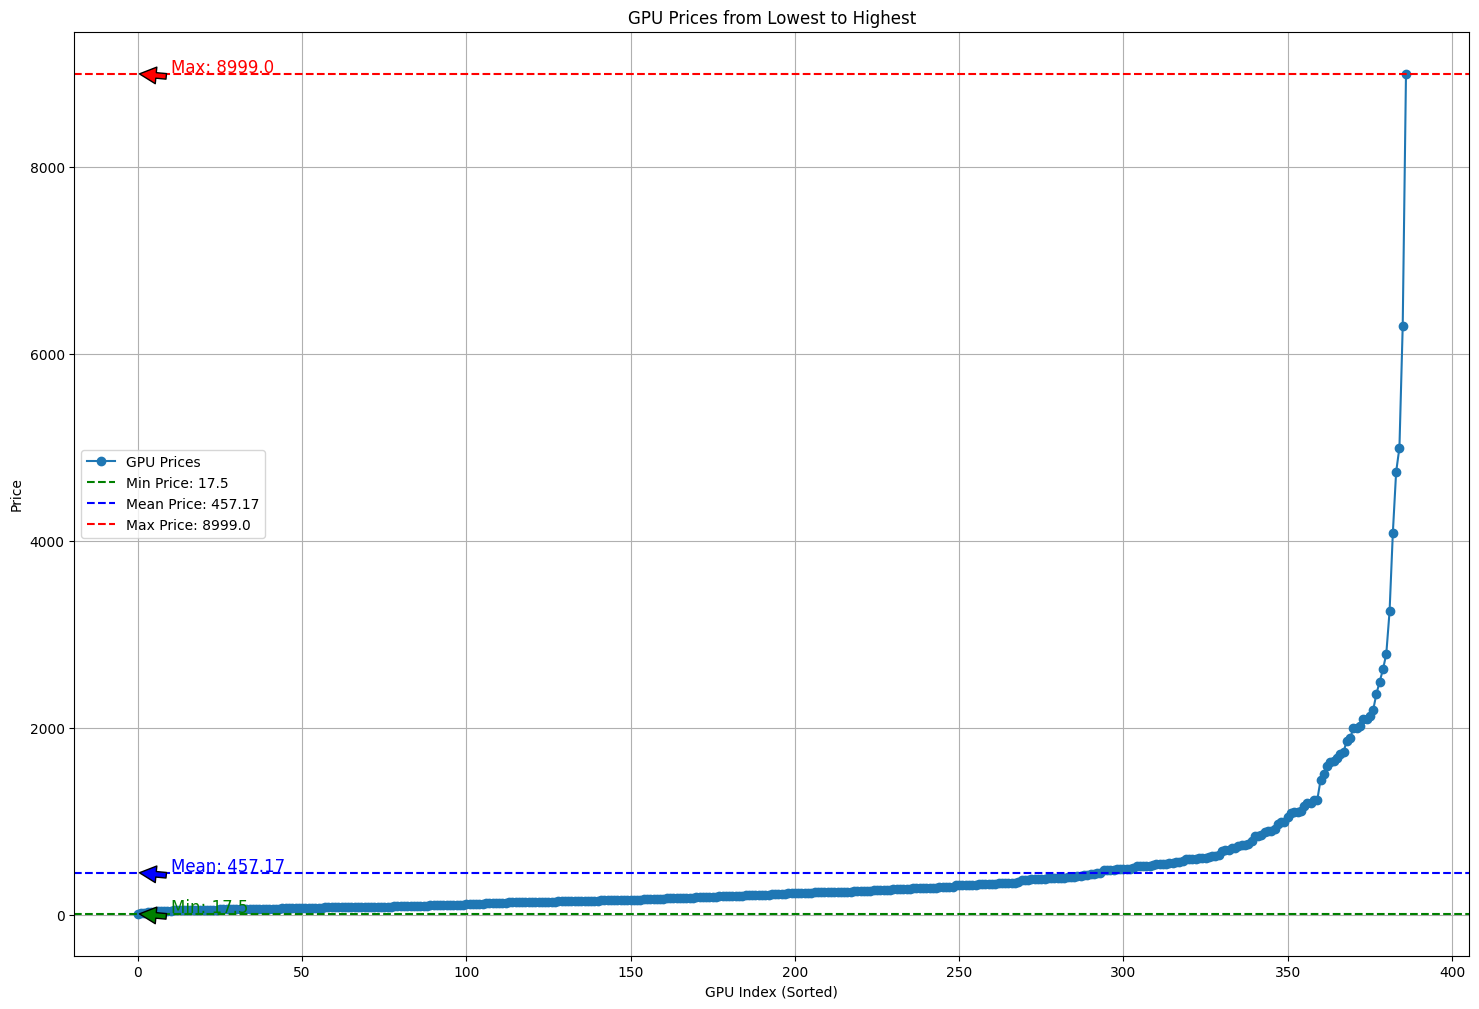

In [11]:
# Calculate statistics
min_price = df['price'].min()
mean_price = df['price'].mean()
max_price = df['price'].max()

# Sort the DataFrame by price
df_sorted = df.sort_values(by='price')

# Plot the sorted prices
plt.figure(figsize=(18, 12))
plt.plot(df_sorted['price'].values, marker='o', label='GPU Prices')
plt.axhline(y=min_price, color='g', linestyle='--', label=f'Min Price: {min_price}')
plt.axhline(y=mean_price, color='b', linestyle='--', label=f'Mean Price: {mean_price:.2f}')
plt.axhline(y=max_price, color='r', linestyle='--', label=f'Max Price: {max_price}')

# Annotate min, mean, and max prices
plt.annotate(f'Min: {min_price}', xy=(0, min_price), xytext=(10, min_price + 10),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green')
plt.annotate(f'Mean: {mean_price:.2f}', xy=(0, mean_price), xytext=(10, mean_price + 10),
             arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
plt.annotate(f'Max: {max_price}', xy=(0, max_price), xytext=(10, max_price + 10),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

# Add titles and labels
plt.title('GPU Prices from Lowest to Highest')
plt.xlabel('GPU Index (Sorted)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### FEAUTURE ENGINEERING

Categorize the target variable (price)

In [12]:
df['price_range'] = pd.cut(df['price'], bins=[0, 200, 400, float('inf')], labels=['low-end', 'mid-end', 'high-end'])

Define features and target variable

In [14]:
X= df.drop(columns=['price_range'])
y = df['price_range']

X.head()
y.head()

0    high-end
1    high-end
2    high-end
3    high-end
4    high-end
Name: price_range, dtype: category
Categories (3, object): ['low-end' < 'mid-end' < 'high-end']

Preprocessing

In [15]:
numeric_features = ['G3Dmark', 'G2Dmark', 'gpuValue', 'TDP', 'powerPerformance', 'testDate']
categorical_features = ['category']

Preprocessing pipelines for both numeric and categorical data

In [17]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


Combine preprocessing steps

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

### Define the model

In [19]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

### Split the data into training and testing sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Train the model


In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['G3Dmark', 'G2Dmark',
                                                   'gpuValue', 'TDP',
                                                   'powerPerformance',
                                                   'testDate']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['category'])])),
                ('classifier', LogisticRegression(max_iter=200))])

### Evaluate the model

In [22]:
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    high-end       1.00      0.88      0.94        25
     low-end       0.85      0.94      0.89        36
     mid-end       0.75      0.71      0.73        17

    accuracy                           0.87        78
   macro avg       0.87      0.84      0.85        78
weighted avg       0.88      0.87      0.87        78



### Analysis
**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. For the high-end category, the precision is 1.00, indicating that out of all instances predicted as high-end, 100% were correctly classified. For the low-end category, the precision is 0.85, meaning that out of all instances predicted as low-end, 85% were correctly classified. For the mid-end category, the precision is 0.75, indicating that 75% of the instances predicted as mid-end were correctly classified.

**Recall**: Recall, also known as sensitivity or true positive rate, is the ratio of correctly predicted positive observations to all actual positives. For the high-end category, the recall is 0.88, indicating that the model correctly identified 88% of all actual instances of high-end. For the low-end category, the recall is 0.94, meaning that the model captured 94% of all actual instances of low-end. For the mid-end category, the recall is 0.71, showing that the model only captured 71% of all actual instances of mid-end.

**F1-score**: F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. For the high-end category, the F1-score is 0.94. For the low-end category, it is 0.89. For the mid-end category, it is 0.73.

**Support**: Support is the number of actual occurrences of the class in the specified dataset. For the high-end category, the support is 25. For the low-end category, it is 36. For the mid-end category, it is 17.

**Accuracy**: Overall accuracy of the model is 0.87, meaning that the model correctly predicted the class label for 87% of the instances in the test set.

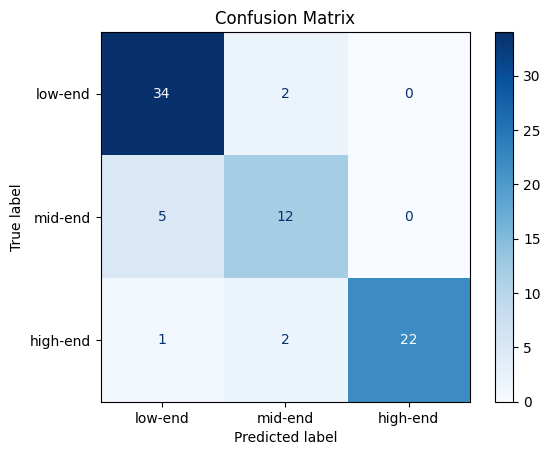

In [24]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['low-end', 'mid-end', 'high-end'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['low-end', 'mid-end', 'high-end'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class (or vice versa).

In the confusion matrix plot:

low-end: 34 true positives, 2 false negatives, 0 false positives.

mid-end: 5 false positives, 12 true positives, 0 false negatives.

high-end: 1 false positive, 2 false negatives, 22 true positives.

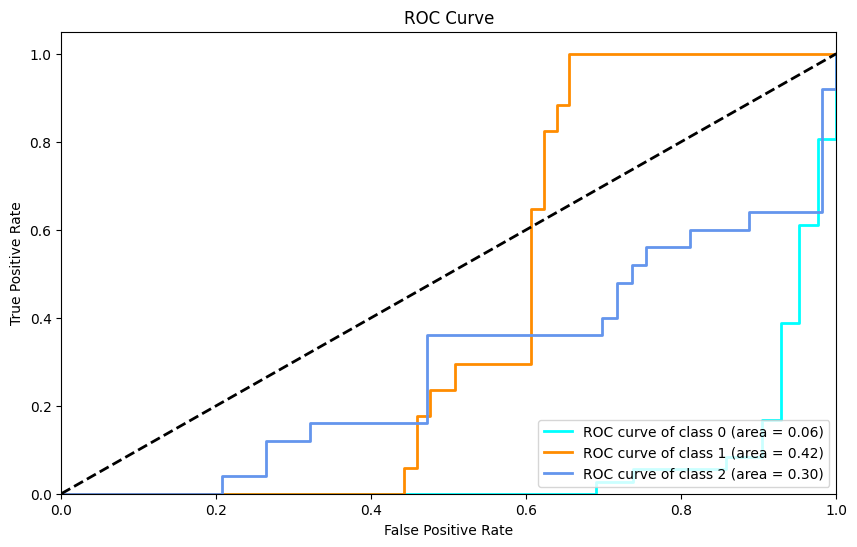

In [27]:
# Binarize the output
y_test_binarized = label_binarize(y_test, classes=['low-end', 'mid-end', 'high-end'])
y_pred_proba = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_binarized.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Analysis
**True Positive Rate (TPR)**: Also known as recall or sensitivity, it is the ratio of correctly predicted positive observations to all the actual positives.

**False Positive Rate (FPR)**: The ratio of incorrectly predicted positive observations to all the actual negatives.

**Area Under the Curve (AUC)**: The AUC represents the degree or measure of separability. Higher AUC values indicate better model performance.

ROC curve of class 0 (area = 0.06): Indicates very poor performance for this class.

ROC curve of class 1 (area = 0.42): Indicates moderate performance for this class.

ROC curve of class 2 (area = 0.30): Indicates poor performance for this class.


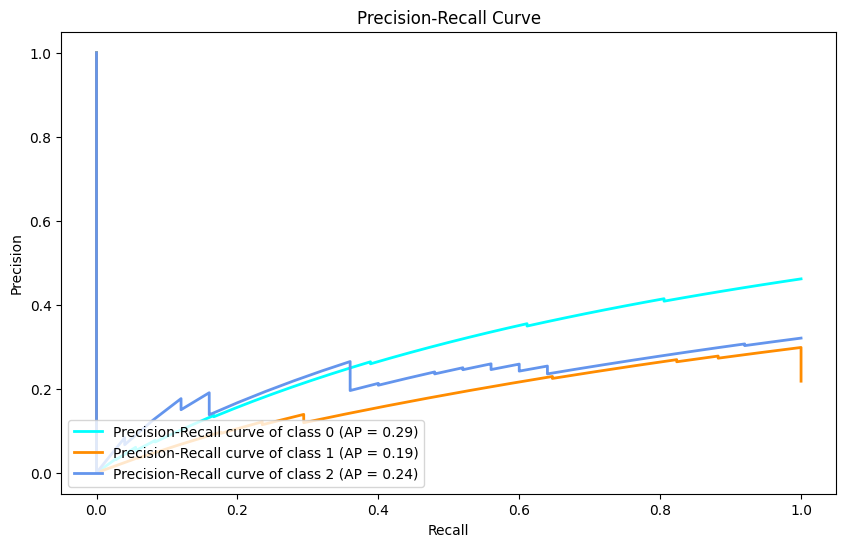

In [30]:
# Calculate Precision-Recall curve
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    average_precision[i] = average_precision_score(y_test_binarized[:, i], y_pred_proba[:, i])

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'Precision-Recall curve of class {i} (AP = {average_precision[i]:0.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

**Precision**: The ratio of correctly predicted positive observations to the total predicted positives.

**Recall**: The ratio of correctly predicted positive observations to all the observations in the actual class.
Precision-Recall curve of class 0 (AP = 0.29): Average precision is 0.29 for class 0.

Precision-Recall curve of class 1 (AP = 0.19): Average precision is 0.19 for class 1.

Precision-Recall curve of class 2 (AP = 0.24): Average precision is 0.24 for class 2.

The higher the area under the curve, the better the performance of the model. It shows the trade-off between precision and recall.